## STEP 1: Import Libraries / Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

## STEP 2: Visualize Data

[7]


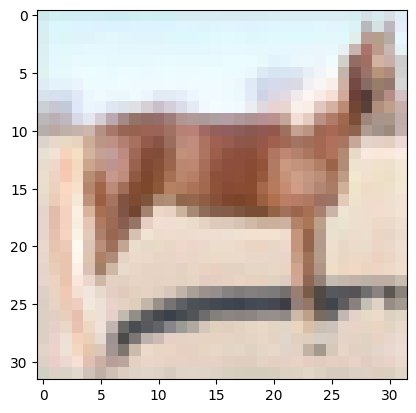

In [7]:
i = 20010
plt.imshow(X_train[i])
print(y_train[i])

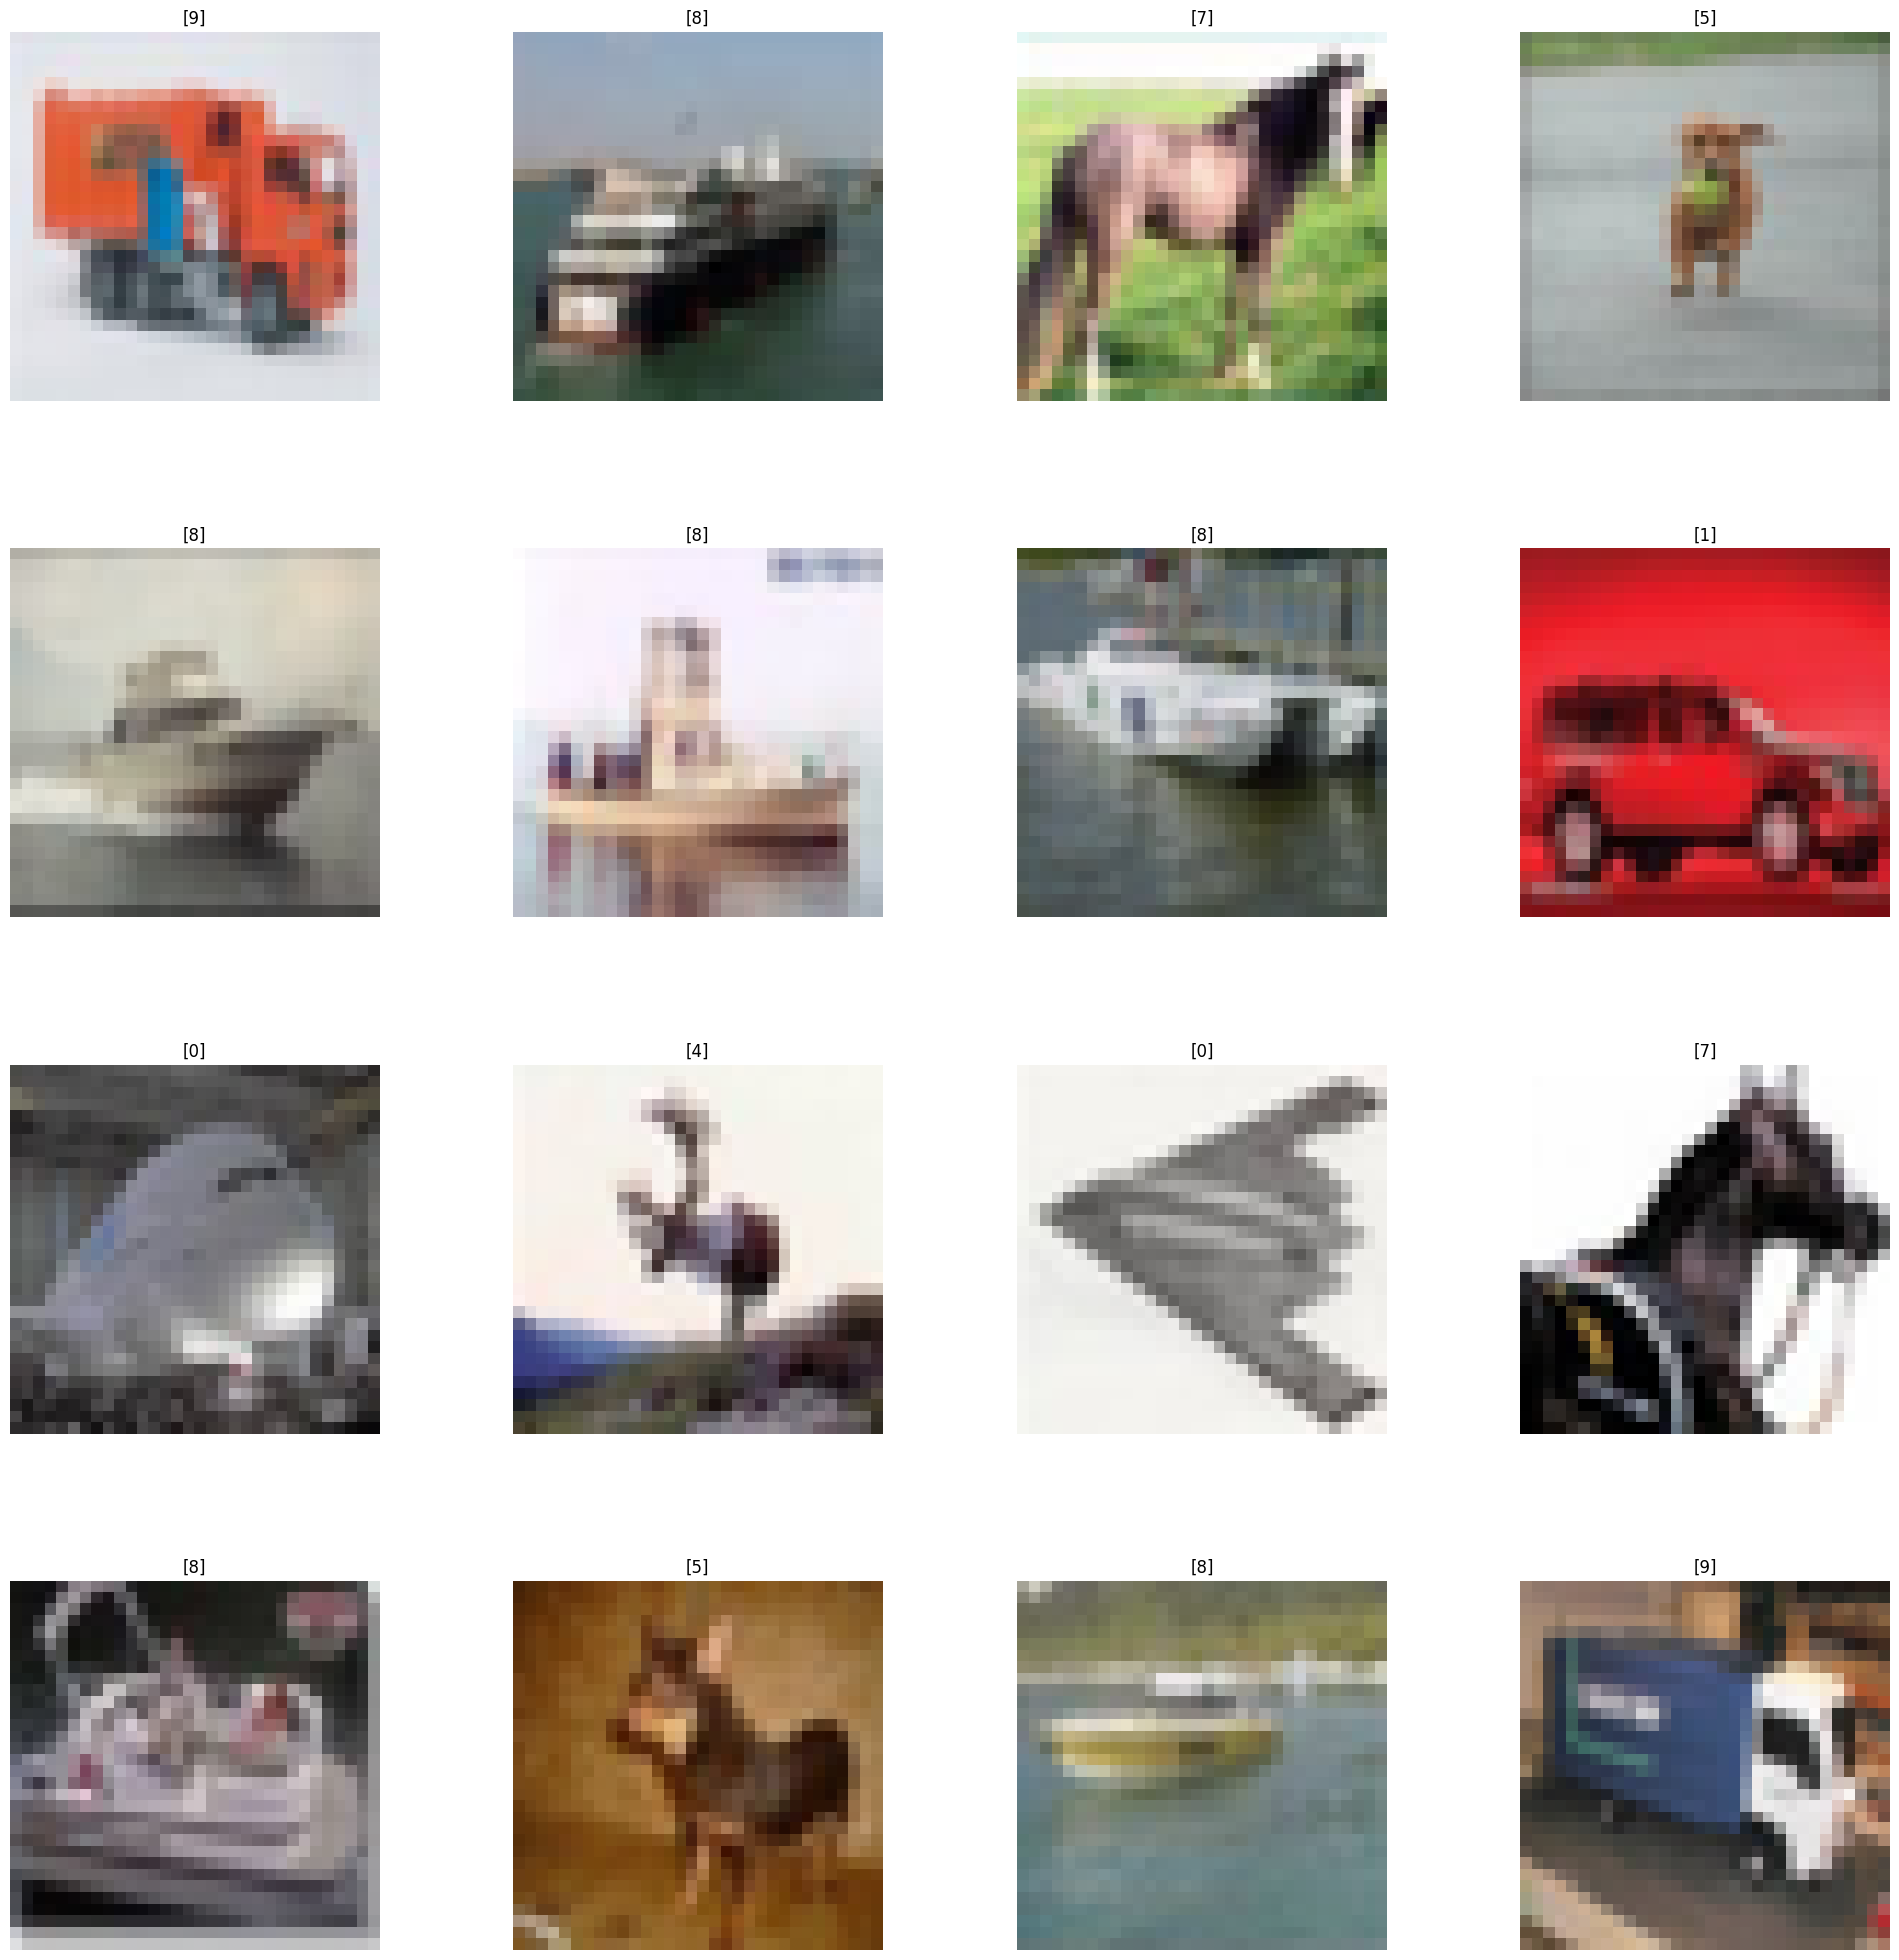

In [8]:
W_grid  = 4 
L_grid = 4
fig , axes = plt.subplots(L_grid, W_grid , figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
    index = np.random.randint(0,n_training) 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

## STEP 3: Data Preparation

In [10]:
X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
X_train  = X_train/255
X_test = X_test/255

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

## STEP 4: Train The Model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

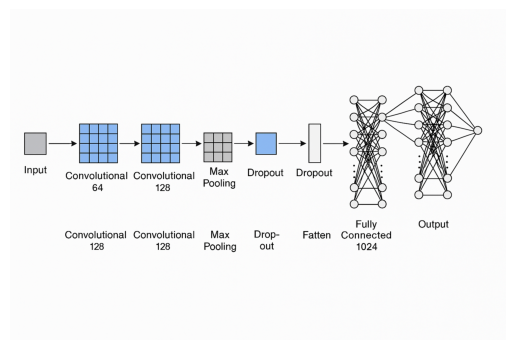

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('image.png')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128 , kernel_size = (3,3), activation='relu'))
cnn_model.add(Conv2D(filters = 128 , kernel_size = (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 1024, activation='relu'))
cnn_model.add(Dense(units = 1024, activation='relu'))

cnn_model.add(Dense(units = 10, activation='softmax'))


C:\Users\ermud\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
from tensorflow.keras.optimizers import RMSprop

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [24]:
history = cnn_model.fit(X_train, y_train , batch_size = 32, epochs = 1, shuffle = True)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.3083 - loss: 1.8812


In [25]:
history

## STEP 5: Evaluate The Model

In [26]:
evaluation  =cnn_model.evaluate(X_test, y_test)
print("Test Accuracy : ",evaluation[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5473 - loss: 1.2578
Test Accuracy :  0.5501999855041504


In [27]:

predicted_class = cnn_model.predict(X_test)
predicted_class 

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


array([[4.35660873e-03, 1.50477630e-03, 2.18759850e-02, ...,
        1.68990269e-02, 1.21812187e-02, 1.44729670e-03],
       [6.72100484e-01, 1.94664299e-01, 2.86717288e-04, ...,
        5.23878771e-05, 1.20653145e-01, 1.19170360e-02],
       [4.76849347e-01, 7.60065541e-02, 2.07421407e-02, ...,
        9.33951978e-03, 3.10787231e-01, 7.83790872e-02],
       ...,
       [3.57033801e-04, 1.28021729e-05, 4.79628257e-02, ...,
        4.12061304e-01, 8.84150504e-05, 1.52856141e-04],
       [1.88006610e-01, 7.25112408e-02, 2.44993299e-01, ...,
        2.30791867e-02, 1.00063253e-02, 4.80517093e-03],
       [1.77335423e-05, 1.12708015e-07, 5.80491149e-04, ...,
        9.22176063e-01, 4.34971184e-07, 1.65082031e-06]], dtype=float32)

In [28]:
for i in dir(cnn_model):
    if i[0] in 'f':
        print(i)

fit
from_config


In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [30]:
y_test = y_test.argmax(1)

In [31]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

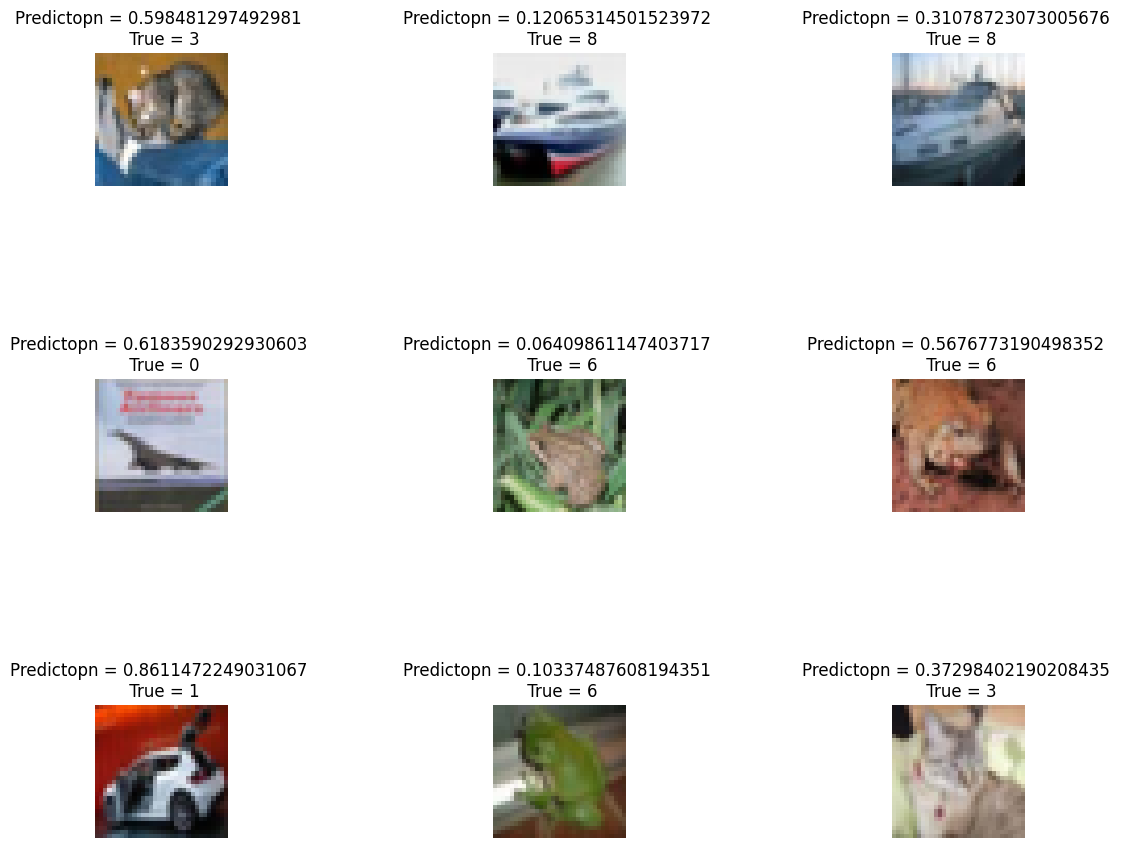

In [32]:
L = 3
W = 3
fig, axes = plt.subplots(L,W , figsize  = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predictopn = {} \n True = {}'.format(predicted_class[i][y_test[i]], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 2)

In [33]:
predicted_classes = []
for i in predicted_class:
    j=0
    predicted_classes.append(i[y_test[j]])
    j+=1

    

In [ ]:
import numpy as np

arr_predicted = np.array(predicted_classes)
print(arr_predicted)
print(y_test.reshape(-1,1))


[5.9848130e-01 9.6274071e-06 5.4294760e-03 ... 1.3334376e-01 1.0161449e-02
 3.0318706e-04]
[0.]


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# cm  = confusion_matrix(arr_predicted,)
# print(cm)
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, annot=True)


## STEP 6: Saving The Model

In [36]:
import os
dir = os.path.join(os.getcwd(),'saved_models')
print(dir)
if not os.path.isdir(dir):

    os.makedirs(dir)
model_path = os.path.join(dir,' keras_cifar10_trained_model.h5')
print(model_path)

d:\ml_project\project2\saved_models
d:\ml_project\project2\saved_models\ keras_cifar10_trained_model.h5


## STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

#### 1. Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.

#### 2. Augmentations also include shifting and changing the brightness of the images.

## STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [37]:
import keras  
from keras.datasets import cifar10  
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)

X_train = X_train.astype('float32')  
X_test = X_test.astype('float32')  
print(X_train.shape)

n = 8  
X_train_sample = X_train[:n]  
X_train_sample.shape


(50000, 32, 32, 3)
(50000, 32, 32, 3)


(8, 32, 32, 3)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))

dataget_train.fit(X_train_sample)

dataget_train

In [39]:
X_train_sample.shape

(8, 32, 32, 3)

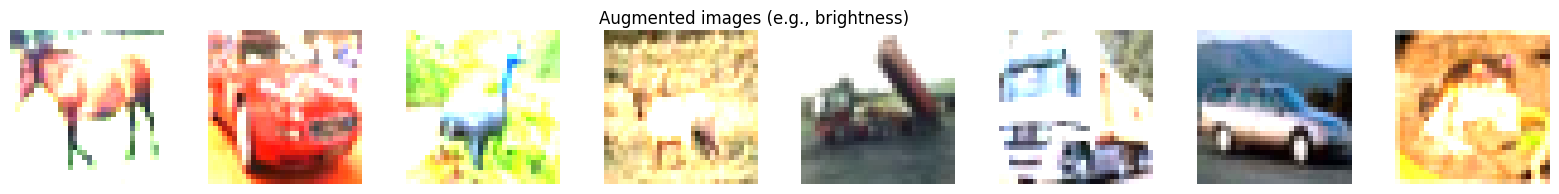

In [40]:
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

# Assume X_train_sample is a NumPy array of shape (samples, height, width, channels)
# and `n` is the number of images you want to display

fig = plt.figure(figsize=(20, 2))
for X_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        img = Image.fromarray(X_batch[i].astype('uint8'))
        ax.imshow(img)
        ax.axis('off')  # Hide axis
    fig.suptitle('Augmented images (e.g., brightness)')
    plt.show()
    break


## STEP 7.2 MODEL TRAINING USING AUGMENTED DATASET

In [47]:
from tensorflow.keras.utils import to_categorical

# Assuming 10 classes
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [48]:
datagen.fit(X_train)

cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.2401 - loss: 4.7688
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.3226 - loss: 1.8785
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3085 - loss: 1.9019
Test accuracy: 0.30300000309944153


In [49]:
# save the model  
directory = os.path.join(os.getcwd(), 'saved_models')  
if not os.path.isdir(directory):  
    os.makedirs(directory)  
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')  
cnn_model.save(model_path)